### **다음 분기에 어떤 게임을 설계해야 할까**

1. 지역에 따라서 선호하는 게임 장르가 다를까 
2. 연도별 게임의 트렌드가 있을까 
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 포함

### Keyword
- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
- Sprint 2 : Hypothesis Test, CI, Bayesian
- Sprint 3 : DR, PCA, Cluster

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다

In [1]:
import pandas as pd

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(url)

In [2]:
### 데이터 전처리 ###
# nan값 제거하기
df = df.dropna()
del df['Unnamed: 0'] # 필요없는 열 삭제하기

# Genre에서 Platform이라는 행 제거하기
df = df[df.Genre != 'Platform']

# Sales 데이터만 불러오기
df_sales = df.loc[:, 'NA_Sales':'Other_Sales']
df_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
5,0,0,0.14,0


In [3]:
# Sales data에 K * 1000, M * 1000000 하기
for names in df_sales :

    for idx, val in df_sales[names].items() :

        if val[len(val)-1] == 'K' :
            new_num = float(val[:-1]) * 0.001

        elif val[len(val)-1] == 'M' :
            new_num = float(val[:-1])

        else :
            new_num = float(val)
        df_sales.loc[idx,names] = new_num

df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
5,0,0,0.14,0
...,...,...,...,...
16592,0,0,0.02,0
16594,0.01,0,0,0
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [4]:
df.iloc[:,5:] = df_sales

# 1900년도 이후의 데이터만 저장하기
import numpy as np

df = df.loc[df.loc[:, 'Year'] > 1900]
df.loc[:, 'Year'] = np.int64(df.loc[:, 'Year'])
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
...,...,...,...,...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0,0,0.02,0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 1. 지역에 따라서 선호하는 게임 장르가 다를까 


In [5]:
# 필요한 열 뽑아오기 : Genre, NA_Sales, EU_Sales, JP_Sales, Other_Sales
df_rg = df[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# 장르로 묶기(각 지역별 총 출고량)
df_rg = df_rg.groupby('Genre').sum()
df_rg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.96,512.52,155.73,183.64
Adventure,101.33,63.32,51.79,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,394.29,207.68,103.71,72.54
Puzzle,121.00,50.39,56.19,12.39
Racing,353.57,234.20,55.42,76.23
Role-Playing,307.08,176.31,336.25,54.71
Shooter,570.89,307.26,37.34,100.82
Simulation,181.04,112.68,63.46,31.24


In [6]:
# 각 지역볋 인기있는 Top 5 장르 추출하기
df_rg1 = df_rg['NA_Sales'].nlargest(5)
df_rg2 = df_rg['EU_Sales'].nlargest(5)
df_rg3 = df_rg['JP_Sales'].nlargest(5)
df_rg4 = df_rg['Other_Sales'].nlargest(5)

result = pd.concat([df_rg1, df_rg2, df_rg3, df_rg4], axis=1)
result = result.fillna(0)
result

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,855.96,512.52,155.73,183.64
Sports,664.33,369.69,134.58,131.73
Shooter,570.89,307.26,0.00,100.82
Misc,394.29,207.68,103.71,72.54
Racing,353.57,234.20,0.00,76.23
Role-Playing,0.00,0.00,336.25,0.00
Fighting,0.00,0.00,86.39,0.00


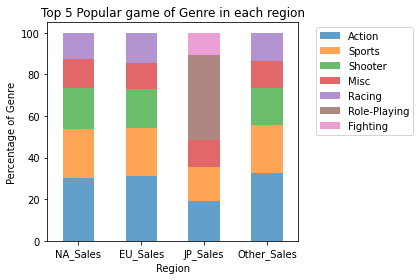

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# pal = sns.color_palette("Set2")
stacked_data = result.transpose().apply(lambda x: x*100/sum(x), axis=1)
stacked_data1 = stacked_data.plot(kind="bar", stacked=True, rot=0, alpha = 0.7)

plt.title("Top 5 Popular game of Genre in each region")
plt.xlabel("Region")
plt.ylabel("Percentage of Genre")

#for rec in stacked_data1.patches:
#    height = rec.get_height()
#    stacked_data1.text(rec.get_x() + rec.get_width() / 2, 
#              rec.get_y() + height / 2,
#              "{:.0f}%".format(height),
#              ha='center')


# 범례 박스 그래프 밖으로 내보내기
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

### 북미, 유럽, 기타 지역은 Action, Sports, Shooter 장르 순으로 인기가 있는 것을 확인할 수가 있다. 즉, 유사하다고 할 수 있다.
### 반면, 일본 지역은 Role-Playing 장르의 게임이 가장 큰 인기를 끌고 있으며, Action, Sports 장르의 게임이 뒤를 따르고 있다.

In [8]:
# 지역에 따라서 선호하는 플랫폼의 차이가 있을까?

# 필요한 열 뽑아오기 : Platform, NA_Sales, EU_Sales, JP_Sales, Other_Sales
df_rp = df[['Platform','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# 장르로 묶기(각 지역별 총 출고량)
df_rp = df_rp.groupby('Platform').sum()
df_rp

# 각 지역볋 인기있는 Top 5 플랫폼 추출하기
df_rp1 = df_rp['NA_Sales'].nlargest(5)
df_rp2 = df_rp['EU_Sales'].nlargest(5)
df_rp3 = df_rp['JP_Sales'].nlargest(5)
df_rp4 = df_rp['Other_Sales'].nlargest(5)

result2 = pd.concat([df_rp1, df_rp2, df_rp3, df_rp4], axis=1)
result2 = result2.fillna(0)
result2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
X360,581.54,270.21,0.00,82.47
PS2,526.97,306.42,131.70,177.88
Wii,446.35,236.47,0.00,71.28
PS3,374.15,328.51,0.00,135.34
DS,343.68,0.00,154.58,52.79
PS,0.00,189.68,133.55,0.00
SNES,0.00,0.00,94.93,0.00
3DS,0.00,0.00,86.08,0.00


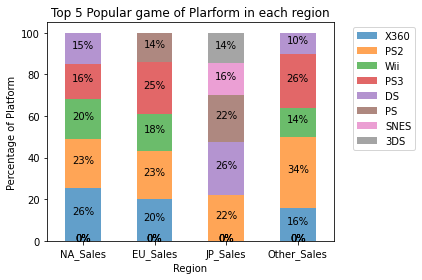

In [9]:
stacked_data2 = result2.transpose().apply(lambda x: x*100/sum(x), axis=1)
stacked_data2 = stacked_data2.plot(kind="bar", stacked=True, rot=0, alpha = 0.7)

plt.title("Top 5 Popular game of Plarform in each region")
plt.xlabel("Region")
plt.ylabel("Percentage of Platform")

for rec in stacked_data2.patches:
    height = rec.get_height()
    stacked_data2.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center')


# 범례 박스 그래프 밖으로 내보내기
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

### 2. 연도별 게임의 트렌드가 있을까 - 출고량, 플랫폼, 장르

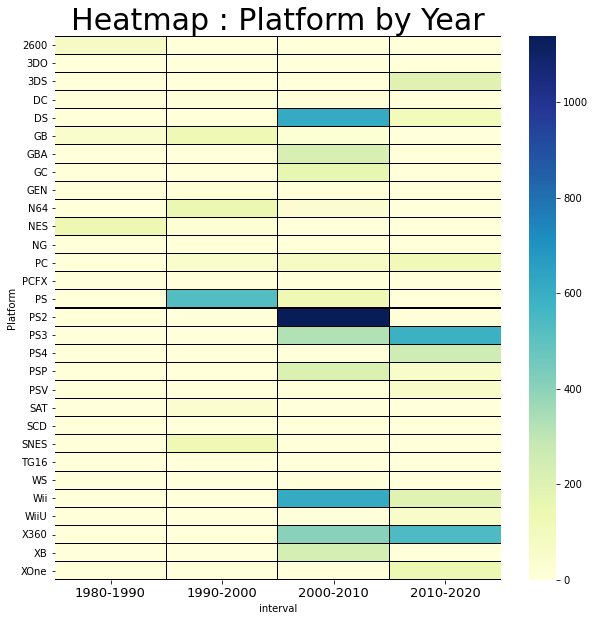

In [10]:
# 연도 구간 나누기 : 1980, 1990, 2000, 2010, 2020
# 1. 연도와 Platform 간의 트렌드 분석
bins = list(range(1980, 2021, 10))
bins_label = [str(x)+"-"+str(x+10) for x in bins]
bins_label

df["interval"] = pd.cut(df["Year"], bins, right=False, labels=bins_label[:-1])
df['total_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df_py = df[['interval','Platform', 'total_sales']]

df_py = df_py.groupby(['interval','Platform']).total_sales.sum()
df_py = pd.DataFrame(data=df_py)
df_py = df_py.fillna(0)
df_py = df_py.reset_index()

import seaborn as sns

df_pivot = df_py.pivot('Platform', 'interval', 'total_sales')

# heatmap 그리기
plt.rcParams['figure.figsize'] = [10,10]
ax = sns.heatmap(df_pivot, cmap="YlGnBu", linewidths= 0.01, linecolor='black')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 13)
plt.title('Heatmap : Platform by Year', fontsize=30)
plt.show() 

### 1980-1990 : NES
### 1990-2000 : PS
### 2000-2010 : PS2, DS, Wii
### 2010-2020 : PS3, X360

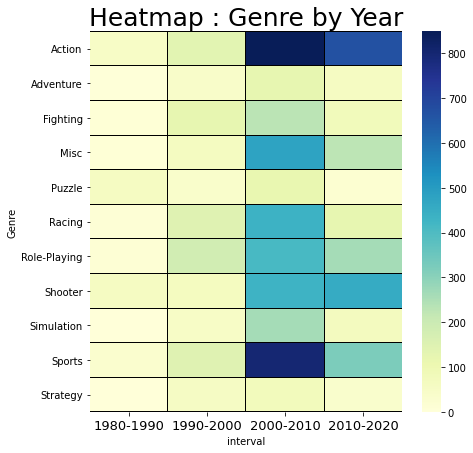

In [11]:
# 1. 연도와 Genre 간의 트렌드 분석
df_gy = df[['interval','Genre', 'total_sales']]
df_gy = df_gy.groupby(['interval','Genre']).total_sales.sum()
df_gy = pd.DataFrame(data=df_gy)
df_gy = df_gy.fillna(0)
df_gy = df_gy.reset_index()

import seaborn as sns
import numpy as np

df_pivot2 = df_gy.pivot('Genre', 'interval', 'total_sales')

# heatmap 그리기
plt.rcParams['figure.figsize'] = [7,7]
ax = sns.heatmap(df_pivot2, linewidths= 0.01, linecolor='black', cmap="YlGnBu")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 13)
plt.title('Heatmap : Genre by Year', fontsize=25)
plt.show() 


### 1980-1990 : Puzzle, Shooter, Action
### 1990-2000 : Role-Playing, Racing, Sports
### 2000-2010 : Action, Sports, Misc
### 2010-2020 : Action, Shooter, Sports

### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 포함

In [12]:
# Publisher, Genre, Platform, total_sales로 DataFrame 만들기
df["total_sales"] = df["total_sales"].astype(str).astype(float)
df_hs = df[['Publisher','Genre', 'Platform', 'total_sales']]
df_hs

,Publisher,Genre,Platform,total_sales
0,Destineer,Action,DS,0.04
1,Namco Bandai Games,Action,Wii,0.18
2,Alchemist,Adventure,PSP,0.02
3,Zoo Games,Misc,DS,0.04
5,Konami Digital Entertainment,Sports,DS,0.14
...,...,...,...,...
16592,Zenrin,Misc,PSP,0.02
16594,Rising Star Games,Action,PSP,0.01
16595,Take-Two Interactive,Sports,PS3,0.79
16596,Tecmo Koei,Action,PSV,0.38


In [13]:
# 총 출고량 상위 50위 추출
df_hs1 = df_hs.nlargest(50, 'total_sales') # sum값 = 909.21
df_hs1

# 총 출고량 기준 상위 1위의 게임은 82.74로 약 9%의 매출을 차지하고 있음

,Publisher,Genre,Platform,total_sales
2908,Nintendo,Sports,Wii,82.74
12579,Nintendo,Racing,Wii,35.83
3352,Nintendo,Sports,Wii,33.00
7829,Nintendo,Role-Playing,GB,31.38
1203,Nintendo,Puzzle,GB,30.26
3014,Nintendo,Misc,Wii,29.01
10488,Nintendo,Shooter,NES,28.31
11137,Nintendo,Simulation,DS,24.75
10650,Nintendo,Racing,DS,23.43
9416,Nintendo,Role-Playing,GB,23.09


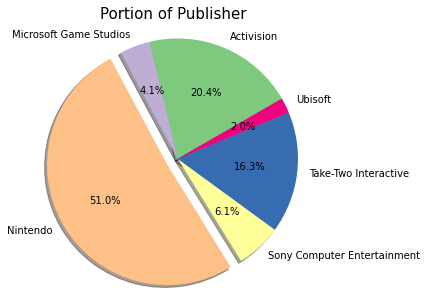

In [14]:
# Publisher의 비중
group_p = df_hs1.groupby('Publisher')
df_p = group_p.count()
df_p = df_p.iloc[:,-1] # 마지막 열만
df_p = pd.DataFrame(data=df_p)
df_p

# pie chart 그리기
pal = sns.color_palette("Accent")
labels = 'Activision', 'Microsoft Game Studios', 'Nintendo', 'Sony Computer Entertainment', 'Take-Two Interactive', 'Ubisoft'
sizes = [10, 2, 25, 3, 8, 1]
explode = (0, 0, 0.1, 0, 0, 0)

plt.rcParams['figure.figsize'] = [5,5]
plt.pie(sizes, explode=explode, labels=labels, startangle=30, shadow=True, autopct='%1.1f%%', colors=pal)

plt.axis('equal')
plt.title('Portion of Publisher', fontsize=15)
plt.show()

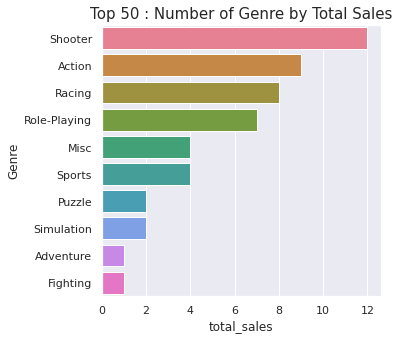

In [36]:
# Genre의 비중
group_g = df_hs1.groupby('Genre')
df_g = group_g.count()
df_g = df_g.iloc[:,-1] # 마지막 열만
df_g = df_g.reset_index()
df_g = pd.DataFrame(data=df_g)
df_g

plt.rcParams['figure.figsize'] = [5,5]
sns.set(style="darkgrid")
df_g = df_g.sort_values(['total_sales'] , ascending = False)
ax = sns.barplot(data= df_g, x= "total_sales", y= 'Genre', palette="husl")

plt.title('Top 50 : Number of Genre by Total Sales', fontsize=15)
plt.show()

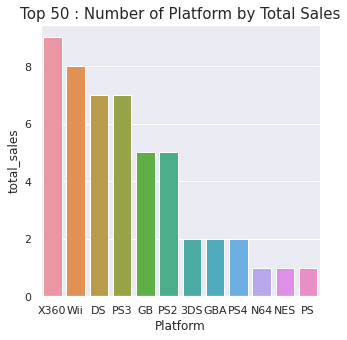

In [35]:
# Platformd의 비중
group_p = df_hs1.groupby('Platform')
df_p = group_p.count()
df_p = df_p.iloc[:,-1] # 마지막 열만
df_p = df_p.reset_index()
df_p = pd.DataFrame(data=df_p)
df_p

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [5,5]
df_p = df_p.sort_values(['total_sales'] , ascending = False)
sns.barplot(data= df_p, x= "Platform", y= 'total_sales')
plt.title('Top 50 : Number of Platform by Total Sales', fontsize=15)
plt.show()

## Platform을 xbox, nintendo, playstation, others로 묶고 분석을 다시 해볼까?

1. 출고량 순위 파악
2. 일본 출고량과 장르 연관이 있는가
3. 일본 출고량과 플랫폼 연관이 있는가
4. 일본 출고량과 publisher 연관이 있는가
-> 만약 예를 들어 출고량과 장르가 연관이 있다면, 일본에서의 인기 있는 장르를 선택
-> 만약 출고량과 플랫폼이 연관이 있다면, 일본에서 인기 있는 플랫폼 선택
-> 만약 출고량과 Publisher이 연관이 있다면, 일본에서 인기 있는 Publisher 선택

In [17]:
# 북미지역의 출고량과 플랫폼에 대해서 two-sample chi-square test

# 출고량 순위 파악
sum_jp = df["JP_Sales"].sum()
sum_na = df["NA_Sales"].sum()
sum_eu = df["EU_Sales"].sum()
sum_others = df["Other_Sales"].sum()

print(sum_jp, sum_na, sum_eu, sum_others)

1128.989999999956 3837.4200000000874 2178.469999999937 727.2399999999408


In [37]:
# 1, 2위인 북미, 유럽 지역 t-test 돌려보기 
from scipy import stats

av_na = df["NA_Sales"].to_numpy()
av_eu = df["EU_Sales"].to_numpy()

stats.ttest_ind(av_na, av_eu) # statistic=216.08358302067853, pvalue=9.492465861774452e-49

# pvalue < 0.01, 북미 지역을 분석해도 되겠다. 

Ttest_indResult(statistic=14.699781733777739, pvalue=9.492465861872095e-49)

In [19]:
### 북미의 출고량과 플랫폼에 대해서 two-sample chi-square test
# 필요한 열 뽑아오기 
df_na1 = df[['Platform','NA_Sales']]

# 플랫폼으로 묶기
df_na1 = pd.crosstab(df_na1['Platform'],df_na1['NA_Sales'])
df_na1 = pd.DataFrame(data=df_na1)
df_na1

from scipy.stats import chi2_contingency
chi2 = chi2_contingency(df_na1, correction=False)
chi2

# chi-square : 17239.550797473894
# p-value : 4.414262465618702e-274
# df : 11107
# 결론 : p-value가 4.414262465618702e-274 이므로 유의수준 0.05에서 북미의 출고량과 플랫폼은 관련이 있다.

(17239.550797473894,
 4.414262465618702e-274,
 11107,
 array([[2.98792878e+01, 3.35153181e+00, 3.45561665e+00, ...,
         6.93898926e-03, 6.93898926e-03, 6.93898926e-03],
        [8.45640220e-01, 9.48546740e-02, 9.78004713e-02, ...,
         1.96386489e-04, 1.96386489e-04, 1.96386489e-04],
        [1.31356114e+02, 1.47340927e+01, 1.51916732e+01, ...,
         3.05053679e-02, 3.05053679e-02, 3.05053679e-02],
        ...,
        [3.38819848e+02, 3.80051060e+01, 3.91853888e+01, ...,
         7.86855198e-02, 7.86855198e-02, 7.86855198e-02],
        [2.10282535e+02, 2.35871956e+01, 2.43197172e+01, ...,
         4.88347735e-02, 4.88347735e-02, 4.88347735e-02],
        [5.86310553e+01, 6.57659073e+00, 6.78083268e+00, ...,
         1.36161299e-02, 1.36161299e-02, 1.36161299e-02]]))

In [20]:
### 북미의 출고량과 장르에 대해서 two-sample chi-square test
# 필요한 열 뽑아오기 
df_na2 = df[['Genre','NA_Sales']]

# 플랫폼으로 묶기
df_na2 = pd.crosstab(df_na2['Genre'],df_na2['NA_Sales'])
df_na2 = pd.DataFrame(data=df_na2)
df_na2

from scipy.stats import chi2_contingency
chi2 = chi2_contingency(df_na2, correction=False)
chi2

# chi-square : 5254.66186787822
# p-value : 1.104760669750019e-48
# df : 3830
# 결론 : p-value가 1.104760669750019e-48 이므로 유의수준 0.05에서 북미의 출고량과 장르는 관련이 있다.

(5254.66186787822,
 1.104760669750019e-48,
 3830,
 array([[9.09345117e+02, 1.02000393e+02, 1.05168107e+02, ...,
         2.11180937e-01, 2.11180937e-01, 2.11180937e-01],
        [3.56296413e+02, 3.99654360e+01, 4.12065986e+01, ...,
         8.27441739e-02, 8.27441739e-02, 8.27441739e-02],
        [2.33678581e+02, 2.62115082e+01, 2.70255302e+01, ...,
         5.42681330e-02, 5.42681330e-02, 5.42681330e-02],
        ...,
        [2.37061142e+02, 2.65909269e+01, 2.74167321e+01, ...,
         5.50536790e-02, 5.50536790e-02, 5.50536790e-02],
        [6.45223488e+02, 7.23741163e+01, 7.46217596e+01, ...,
         1.49842891e-01, 1.49842891e-01, 1.49842891e-01],
        [1.87168369e+02, 2.09945012e+01, 2.16465043e+01, ...,
         4.34668761e-02, 4.34668761e-02, 4.34668761e-02]]))

In [21]:
### 북미의 출고량과 Publisher에 대해서 two-sample chi-square test
# 필요한 열 뽑아오기 
df_na3 = df[['Publisher','NA_Sales']]

# 플랫폼으로 묶기
df_na3 = pd.crosstab(df_na3['Publisher'],df_na3['NA_Sales'])
df_na3 = pd.DataFrame(data=df_na3)
df_na3

from scipy.stats import chi2_contingency
chi2 = chi2_contingency(df_na3, correction=False)
chi2

# chi-square : 94561.9404179442
# p-value : 1.0
# df : 216395
# 결론 : p-value가 1.0 이므로 유의수준 0.05에서 북미의 출고량과 Publisher는 관련성이 낮다.

(94561.9404179442,
 1.0,
 216395,
 array([[8.45640220e-01, 9.48546740e-02, 9.78004713e-02, ...,
         1.96386489e-04, 1.96386489e-04, 1.96386489e-04],
        [8.45640220e-01, 9.48546740e-02, 9.78004713e-02, ...,
         1.96386489e-04, 1.96386489e-04, 1.96386489e-04],
        [1.40940037e+00, 1.58091123e-01, 1.63000786e-01, ...,
         3.27310814e-04, 3.27310814e-04, 3.27310814e-04],
        ...,
        [2.81880073e-01, 3.16182247e-02, 3.26001571e-02, ...,
         6.54621629e-05, 6.54621629e-05, 6.54621629e-05],
        [2.81880073e-01, 3.16182247e-02, 3.26001571e-02, ...,
         6.54621629e-05, 6.54621629e-05, 6.54621629e-05],
        [5.63760147e-01, 6.32364493e-02, 6.52003142e-02, ...,
         1.30924326e-04, 1.30924326e-04, 1.30924326e-04]]))

In [208]:
# 장르와 플랫폼이 북미의 출고량과 관련성이 있기 때문에 북미에서 인기있는 장르와 플랫폼을 알아보고자 한다.
# 앞서 연도별 트랜드를 봤다 : 플랫폼(PS3, X360) / 장르(Action, Shooter, Sports)
# 앞서 출고량이 높은 게임의 특징을 봤다 : 플랫폼(X360, Wii, PS3, PS) / 장르(Shooter, Action, Racing) / Publisher : Nintendo

# 지역에 따라서 유행하는 게임의 장르가 다른데 공통적으로 Action, Sports, Misc 이 세 가지의 장르는 모든 지역에서 인기가 있는 편
# 따라서, 이 3가지의 장르를 고려하여 게임을 개발한다면 북미 지역을 타겟으로 게임을 개발한다고 하더라도 여러 지역에서 성공 가능성이 높다고 할 수 있다.

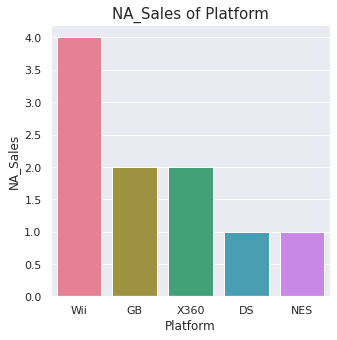

In [47]:
df["NA_Sales"] = df["NA_Sales"].astype(str).astype(float)

# 북미 지역 출고량 & 플랫폼
na_p = df[['Platform','NA_Sales']]
na_p = na_p.nlargest(10, 'NA_Sales')
na_p

# Platformd의 비중
group_na = na_p.groupby('Platform')
na_p = group_na.count()
na_p = na_p.iloc[:,-1] # 마지막 열만
na_p = na_p.reset_index()
na_p = pd.DataFrame(data=na_p)
na_p

sns.set(style="darkgrid")
na_p = na_p.sort_values(['NA_Sales'] , ascending = False)
sns.barplot(data= na_p, x= "Platform", y= 'NA_Sales', palette="husl")

plt.title('NA_Sales of Platform', fontsize=15)
plt.show()

# 출고량이 높은 게임의 특징 중 플랫폼에서는 X360, Wii가 있었다. 기계가 있어야 게임을 할 수 있는데, 북미의 경우 Wii로 플레이할 수 있는 게임의 출고량이 압도적으로 높은 것을 확인할 수 있다.
# 따라서 Wii 플랫폼을 이용하여 플레이할 수 있는 게임을 개발하는 것이 좋을 것으로 사료됨
# 하지만 동시에 트랜드는 X360임. 뜨고 있는 시장을 뚫고 나갈 것이냐. 그것이 문제로다